In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random 

def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector==m)[0]
    return random.choice(indices)

In [ ]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4', 'is_slippery':False}
)

env = gym.make('FrozenLake-v3') 

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])   #16x4

num_episodes = 2000
rList = []

for i in range(num_episodes):
    state = env.reset() #초기 상태로 만들어놓기
    rAll = 0
    done = False

    while not done:
        action = rargmax(Q[state, :])

        new_state, reward, done, info = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward

        state = new_state

    rList.append(rAll)

print(f"Success Rate : {sum(rList)/num_episodes}")
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

Success Rate : 0.94
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


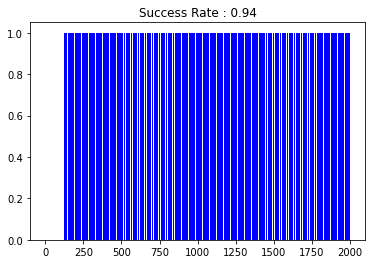

In [ ]:
plt.title(f"Success Rate : {sum(rList)/num_episodes}")
plt.bar(range(len(rList)), rList, color='blue')
plt.show()

**Exploit & Exploration**

In [ ]:
num_episodes = 2000
cList = []

rDict = {'Action':[],
         'Learning':[],
         'rList':[],
         'rScore':[]}

action_list = ['Dummy', 'E-greedy', 'Add Random Noise']
discounted_list = ['NonDiscounted', 'Discounted']

for a in action_list:
    for l in discounted_list:
        Q = np.zeros([env.observation_space.n, env.action_space.n])
        rList = []

        for i in range(num_episodes):
            state = env.reset() 
            rAll = 0
            done = False

            while not done:
                
                # === Action === #
                if a == 'E-greedy':
                    e = 0.1 / ((i//100)+1)  
                    action = env.action_space.sample() if np.random.rand(1)<e else rargmax(Q[state, :])

                elif a == 'Add Random Noise':
                    action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i+1))

                else: action = rargmax(Q[state, :])

                # === Step === #
                new_state, reward, done, info = env.step(action)

                # === Learning === #
                if l == 'Discount Reward':
                    dis = 0.99
                    Q[state, action] = reward + dis*np.max(Q[new_state, :])

                else:
                    Q[state, action] = reward + np.max(Q[new_state, :])                

                rAll += reward
                state = new_state

            rList.append(rAll)

        score = np.sum(rList)/num_episodes

        rDict['Action'].append(a)
        rDict['Learning'].append(l)
        rDict['rList'].append(rList)
        rDict['rScore'].append(score)

        print(f"<{a} + {l}>")
        print(f"Success Rate : {score}")
        print(Q)
        print(f"Distance : {np.sum(Q)} \n")

<Dummy + NonDiscounted>
Success Rate : 0.969
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Distance : 6.0 

<Dummy + Discounted>
Success Rate : 0.9645
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Distance : 6.0 

<E-greedy + NonDiscounted>
Success Rate : 0.832
[[1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]
Distance : 35.0 

<E-greedy + Discounted>
Success Rate : 0.8055
[[1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 1.

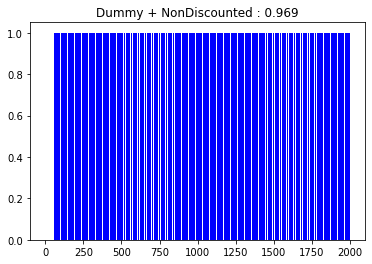

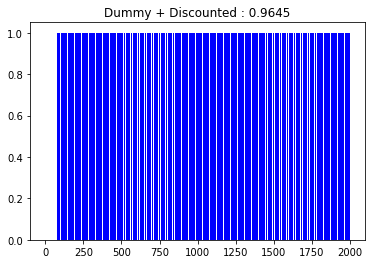

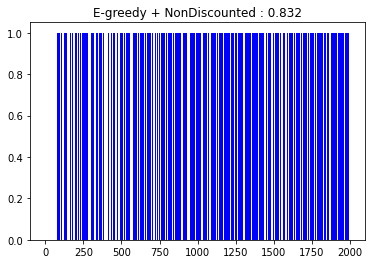

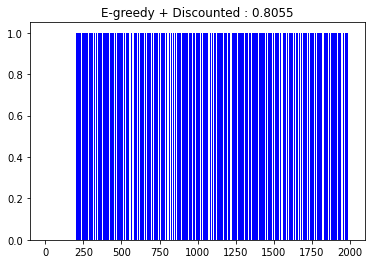

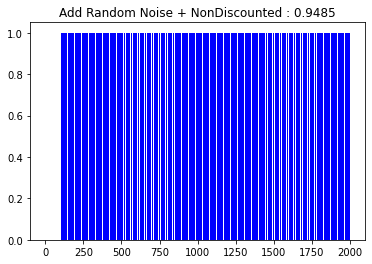

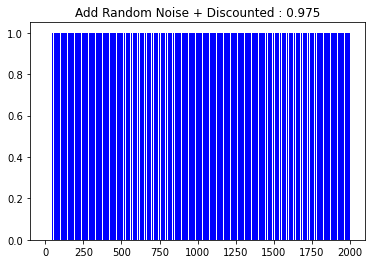

In [ ]:
for i in range(len(rDict['Action'])):
    plt.title(f"{rDict['Action'][i]} + {rDict['Learning'][i]} : {np.sum(rDict['rList'][i])/num_episodes}")
    plt.bar(range(len(rDict['rList'][i])), rDict['rList'][i], color='blue')
    plt.show()